In [642]:
import cv2
import numpy as np
import os
import json
from matplotlib import pyplot as plt
from collections import defaultdict

with open("data/input.json", "r") as f:
    input_data = json.load(f)

image_paths = input_data["image_files"]
image_num = 1

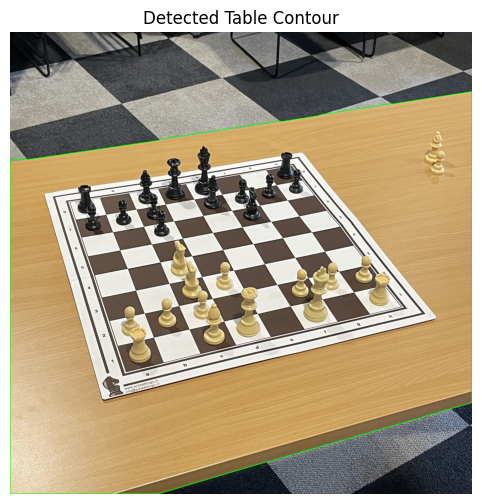

In [643]:
image = cv2.imread("images/G056_IMG017.jpg")

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_brown = np.array([0, 22, 107])
upper_brown = np.array([30, 255, 255])

mask = cv2.inRange(hsv, lower_brown, upper_brown)

kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

table_contour = max(contours, key=cv2.contourArea)

contour_image = image.copy()
cv2.drawContours(contour_image, [table_contour], -1, (0, 255, 0), 3)

contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.title("Detected Table Contour")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()


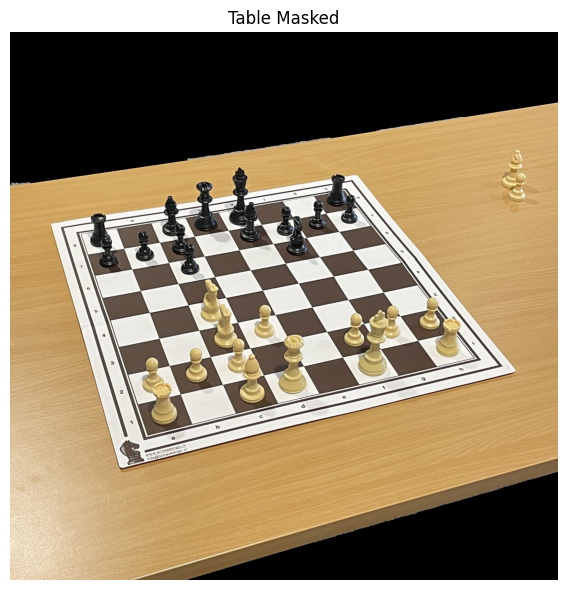

In [644]:
table_mask = np.zeros_like(image)
cv2.drawContours(table_mask, [table_contour], -1, (255, 255, 255), thickness=cv2.FILLED)
masked_image = cv2.bitwise_and(image, table_mask)

masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

# Display both results side-by-side
plt.figure(figsize=(12, 6))

plt.plot(1, 2, 2)
plt.title("Table Masked")
plt.imshow(masked_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


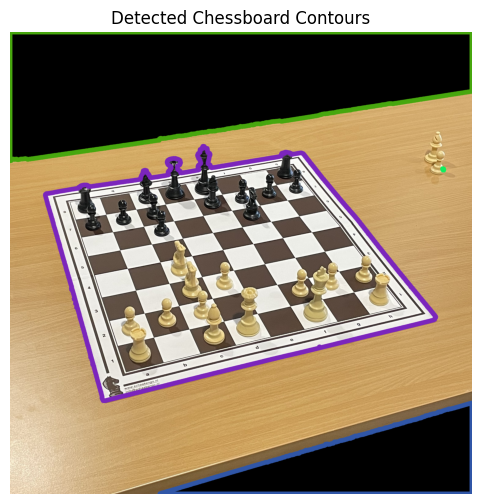

In [645]:
hsv = cv2.cvtColor(masked_image, cv2.COLOR_BGR2HSV)

table_color_mask = cv2.inRange(hsv, lower_brown, upper_brown)
chessboard_mask = cv2.bitwise_not(table_color_mask)

kernel = np.ones((3, 3), np.uint8)
chessboard_mask = cv2.morphologyEx(chessboard_mask, cv2.MORPH_CLOSE, kernel)
chessboard_mask = cv2.morphologyEx(chessboard_mask, cv2.MORPH_OPEN, kernel, iterations=2)

contours_, _ = cv2.findContours(chessboard_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
height, width = chessboard_mask.shape[:2]


# draw contours on the original image
contour_image = masked_image.copy()
for contour in contours_:
    random_color = tuple(np.random.randint(0, 255, 3).tolist())

    cv2.drawContours(contour_image, [contour], -1, random_color, 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contours")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()




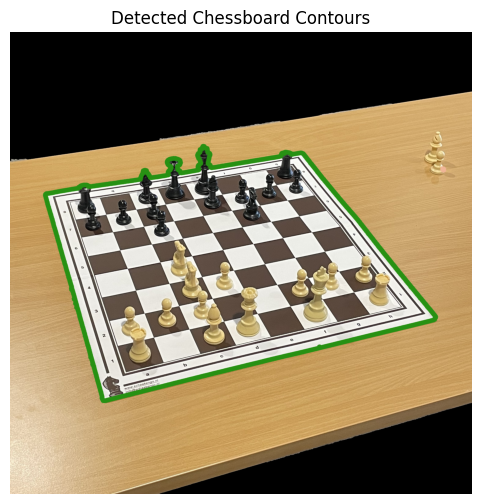

In [646]:

def is_touching_border(contour, width, height):
    for point in contour:
        x, y = point[0]
        if x <= 1 or y <= 1 or x >= width - 2 or y >= height - 2:
            return True
    return False

contours = [cnt for cnt in contours_ if not is_touching_border(cnt, width, height)]


# draw contours on the original image
contour_image = masked_image.copy()
for contour in contours:
    random_color = tuple(np.random.randint(0, 255, 3).tolist())

    cv2.drawContours(contour_image, [contour], -1, random_color, 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contours")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()


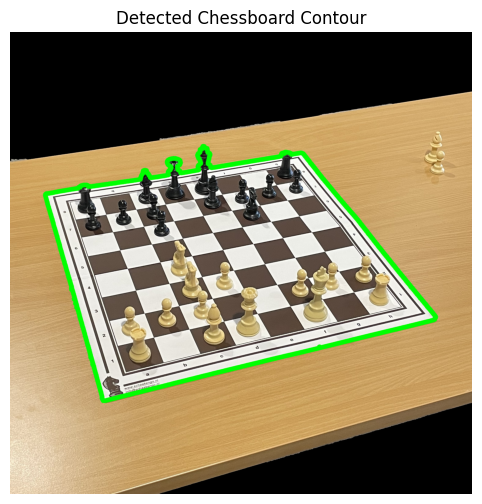

In [647]:
chessboard_countor = max(contours, key=cv2.contourArea)

# draw contours on the original image
contour_image = masked_image.copy()
cv2.drawContours(contour_image, [chessboard_countor], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contour")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()

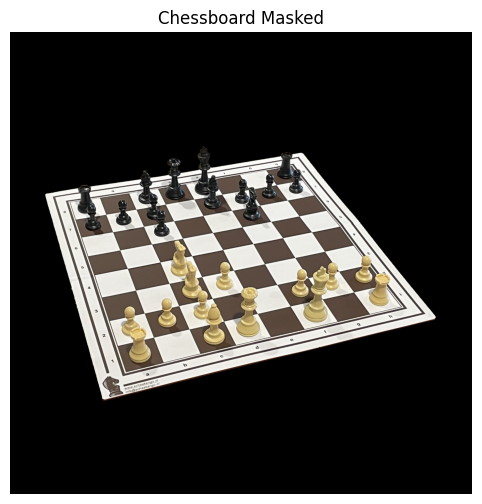

In [648]:
## aply mask to the image
chessboard_mask = np.zeros_like(image)
cv2.drawContours(chessboard_mask, [chessboard_countor], -1, (255, 255, 255), thickness=cv2.FILLED)
masked_image = cv2.bitwise_and(image, chessboard_mask)
masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Chessboard Masked")
plt.imshow(masked_rgb)
plt.axis('off')
plt.show()

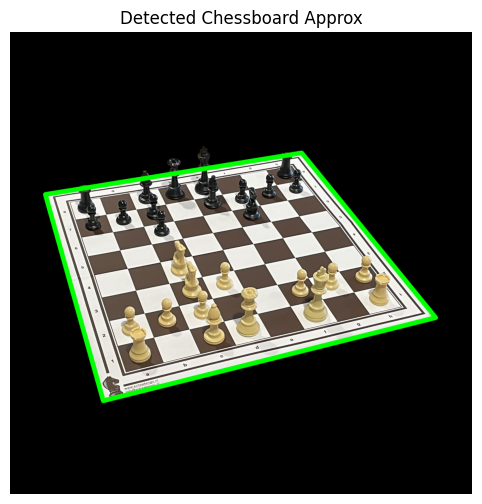

In [649]:
approx = cv2.approxPolyDP(chessboard_countor, 0.06 * cv2.arcLength(chessboard_countor, True), True)

# draw contours on the original image
contour_image = masked_image.copy()
cv2.drawContours(contour_image, [approx], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Approx")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()

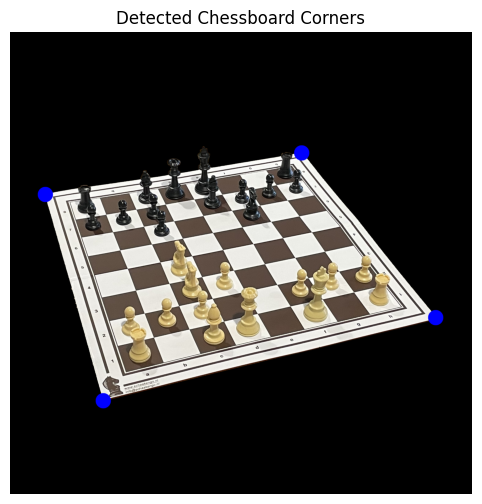

In [650]:
corners = approx.reshape(4, 2)
corners = corners[np.argsort(corners[:, 0])]


left_corners = corners[:2]

top_left = left_corners[np.argmin(left_corners[:, 1])]
bottom_left = left_corners[np.argmax(left_corners[:, 1])]

right_corners = corners[2:]
top_right = right_corners[np.argmin(right_corners[:, 1])]
bottom_right = right_corners[np.argmax(right_corners[:, 1])]


ordered_corners = [top_left, top_right, bottom_right, bottom_left]

# draw contours on the original image
corner_image = masked_image.copy()
for corner in ordered_corners:
    cv2.circle(corner_image, tuple(corner), 50, (255,0,0), -1)

corner_rgb = cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Corners")
plt.imshow(corner_rgb)
plt.axis('off')
plt.show()

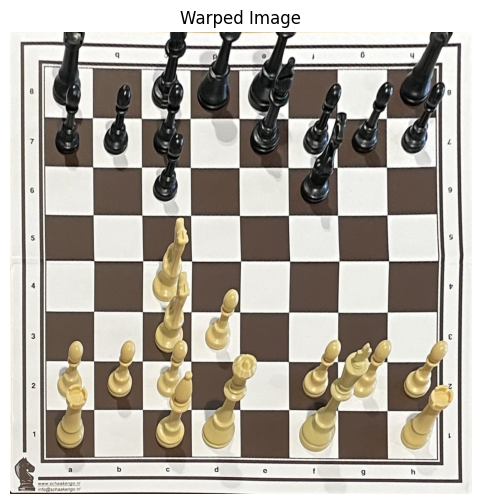

In [651]:
output_size = 3024

dst = np.array([
        [0, 0],
        [output_size - 1, 0],
        [output_size - 1, output_size - 1],
        [0, output_size - 1]
    ], dtype="float32")

M = cv2.getPerspectiveTransform(np.array(ordered_corners, dtype="float32"), dst)
warped = cv2.warpPerspective(image, M, (output_size, output_size))
warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Warped Image")   
plt.imshow(warped_rgb)
plt.axis('off')
plt.show()

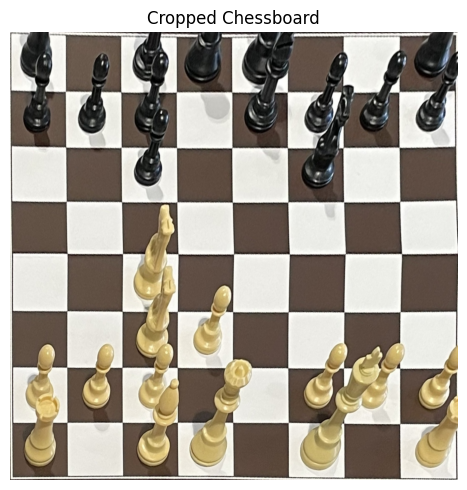

In [652]:
def crop_with_padding(image, padding=0):
    h, w = image.shape[:2]
    top = bottom = left = right = padding

    if padding > 0:
        top = bottom = left = right = padding

    cropped_image = image[top:h-bottom, left:w-right]
    return cropped_image

cropped_chessboard = crop_with_padding(warped, padding=220)

plt.figure(figsize=(10, 5))
plt.title("Cropped Chessboard")
plt.imshow(cv2.cvtColor(cropped_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

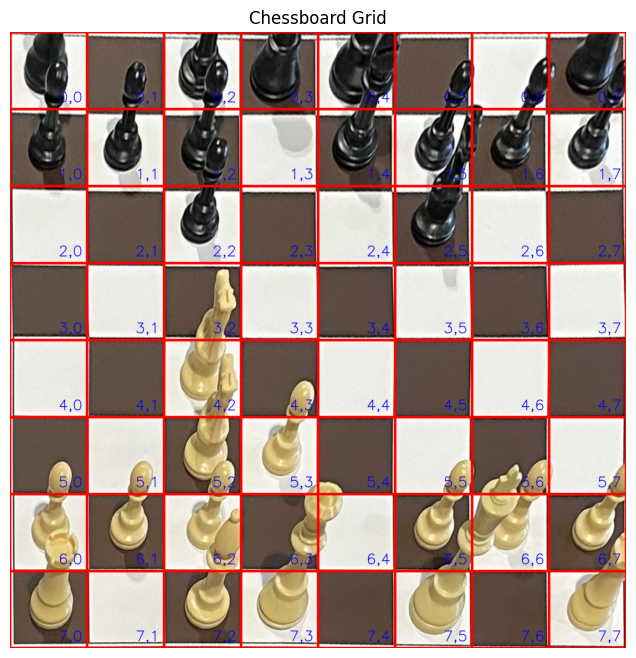

In [653]:
def draw_chess_grid(image, rows=8, cols=8):
    image_copy = image.copy()
    h, w = image.shape[:2]
    cell_height = h // rows
    cell_width = w // cols

    cell_coords = []

    for i in range(rows):
        for j in range(cols):
            x1, y1 = j * cell_width, i * cell_height
            x2, y2 = (j + 1) * cell_width, (i + 1) * cell_height

            cell_coords.append({
                "row": i,
                "col": j,
                "bbox": (x1, y1, x2, y2)
            })

            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 0, 255), 10) 
            cv2.putText(image_copy, f"{i},{j}", (x2 - 120, y2 - 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA) 

    return image_copy, cell_coords



annotated_image, grid_info = draw_chess_grid(cropped_chessboard)

plt.figure(figsize=(8, 8))
plt.title("Chessboard Grid")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [654]:
def detect_single_piece_per_cell(image, grid_info, central_ratio=0.45): 
    piece_positions = []
    image_copy = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    black_range = ((0, 0, 0), (180, 255, 50))
    cream_range = ((15, 30, 130), (40, 150, 255))

    black_count = 0
    cream_count = 0

    for cell in grid_info:
        x1, y1, x2, y2 = cell["bbox"]
        row, col = cell["row"], cell["col"]

        w = x2 - x1
        h = y2 - y1
        margin_x = int((1 - central_ratio) / 2 * w)
        margin_y = int((1 - central_ratio) / 2 * h)
        x1_c = x1 + margin_x
        y1_c = y1 + margin_y
        x2_c = x2 - margin_x
        y2_c = y2 - margin_y

        cell_hsv_patch = hsv[y1_c:y2_c, x1_c:x2_c]
        total_pixels = cell_hsv_patch.shape[0] * cell_hsv_patch.shape[1]

        mask_black = cv2.inRange(cell_hsv_patch, *black_range)
        mask_cream = cv2.inRange(cell_hsv_patch, *cream_range)

        count_black_pixels = cv2.countNonZero(mask_black)
        count_cream_pixels = cv2.countNonZero(mask_cream)
        occupied_pixels = count_black_pixels + count_cream_pixels

        occupied_ratio = occupied_pixels / total_pixels
        free_ratio = 1 - occupied_ratio

        if free_ratio >= 0.72:
            continue

        cell_patch = gray[y1:y2, x1:x2]
        blurred = cv2.GaussianBlur(cell_patch, (3, 3), 0)
        edges = cv2.Canny(blurred, 50, 150)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        has_piece = False
        mid_area_detected = False
        top_feature_detected = False

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 1 and area < w * h:
                cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
                point_from_bottom = False
                point_from_middle = False

                for point in cnt:
                    px, py = point[0]
                    px_global = px + x1
                    py_global = py + y1
                    if py <= 170:
                        point_from_middle = True
                    if py >= h - 40:
                        point_from_bottom = True
                    if point_from_bottom and point_from_middle:
                        continue
                    if 20 < py < 60 and 40 < px < 280:
                        top_feature_detected = True
                    if (cx - 80 <= px_global <= cx + 80) and (cy - 120 <= py_global <= cy + 80):
                        mid_area_detected = True
                        break

                if mid_area_detected and top_feature_detected:
                    has_piece = True
                    break

        if has_piece:  
            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 50)
            cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
            cv2.circle(image_copy, (cx, cy), 3, (0, 0, 255), 40)

            if count_black_pixels > count_cream_pixels:
                piece_positions.append({"row": row, "col": col, "color": "Black"})
                black_count += 1
            else:
                piece_positions.append({"row": row, "col": col, "color": "White"})
                cream_count += 1


    return image_copy, piece_positions, black_count, cream_count


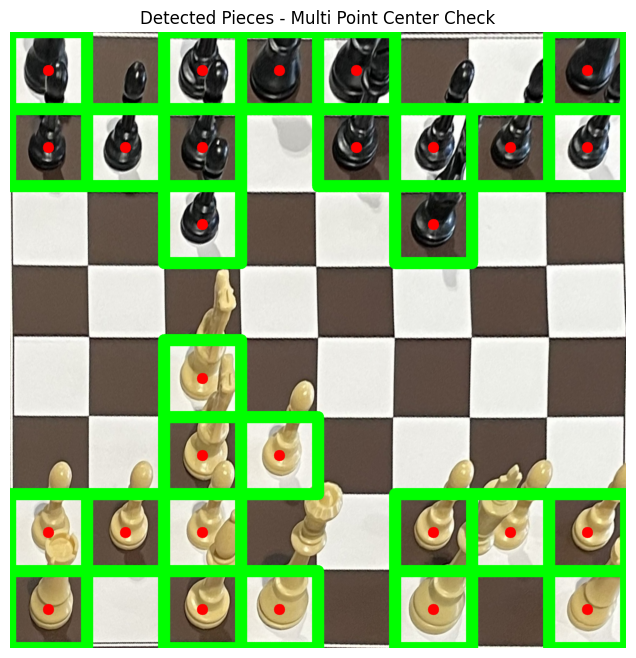

Black pieces: 14
White pieces: 14
Piece found at (0, 0) - Color: Black
Piece found at (0, 2) - Color: Black
Piece found at (0, 3) - Color: Black
Piece found at (0, 4) - Color: Black
Piece found at (0, 7) - Color: Black
Piece found at (1, 0) - Color: Black
Piece found at (1, 1) - Color: Black
Piece found at (1, 2) - Color: Black
Piece found at (1, 4) - Color: Black
Piece found at (1, 5) - Color: Black
Piece found at (1, 6) - Color: Black
Piece found at (1, 7) - Color: Black
Piece found at (2, 2) - Color: Black
Piece found at (2, 5) - Color: Black
Piece found at (4, 2) - Color: White
Piece found at (5, 2) - Color: White
Piece found at (5, 3) - Color: White
Piece found at (6, 0) - Color: White
Piece found at (6, 1) - Color: White
Piece found at (6, 2) - Color: White
Piece found at (6, 5) - Color: White
Piece found at (6, 6) - Color: White
Piece found at (6, 7) - Color: White
Piece found at (7, 0) - Color: White
Piece found at (7, 2) - Color: White
Piece found at (7, 3) - Color: White
Piec

In [655]:
img_with_pieces, pieces, black_count, cream_count = detect_single_piece_per_cell(cropped_chessboard, grid_info)

matrix = np.zeros((8, 8), dtype=int)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_with_pieces, cv2.COLOR_BGR2RGB))
plt.title("Detected Pieces - Multi Point Center Check")
plt.axis("off")
plt.show()

print(f"Black pieces: {black_count}")
print(f"White pieces: {cream_count}")

for piece in pieces:
    matrix[piece["row"], piece["col"]] = 1
    print(f"Piece found at ({piece['row']}, {piece['col']}) - Color: {piece['color']}")

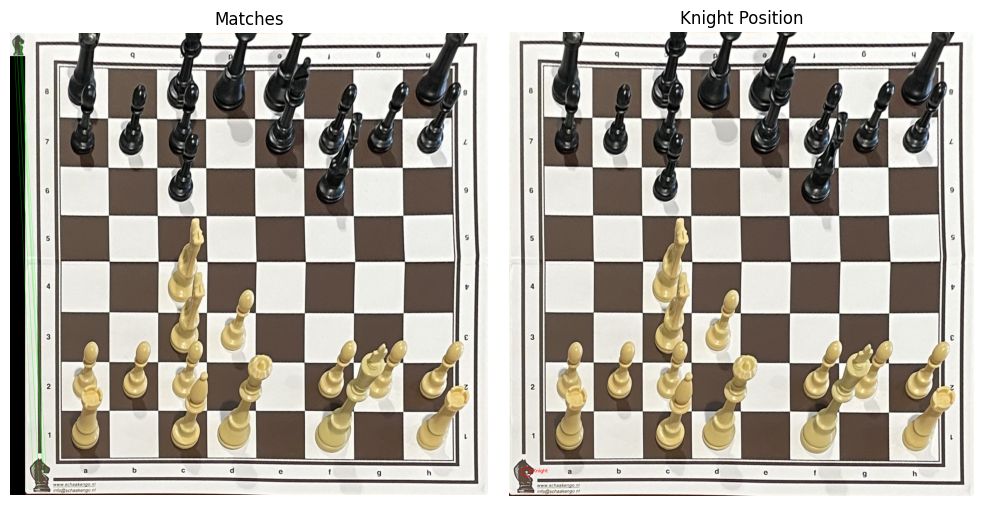

Knight found at position: (114, 2869)


In [656]:
# Load images
knight_gray = cv2.imread("knight.png", cv2.IMREAD_GRAYSCALE)
knight_color = cv2.imread("knight.png")
chessboard_gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
chessboard_color = warped.copy()

# SIFT detector
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(knight_gray, None)
kp2, des2 = sift.detectAndCompute(chessboard_gray, None)

# FLANN matcher
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Ratio test (Lowe's criterion)
good_matches = [m for m, n in matches if m.distance < 0.7 * n.distance]

# Draw matches
match_output = cv2.drawMatches(
    knight_color, kp1, chessboard_color, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0)
)

# Estimate knight position
if good_matches:
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)
    knight_pos = np.median(dst_pts, axis=0).astype(int)

    cv2.circle(chessboard_color, tuple(knight_pos), 30, (0, 0, 255), 3)
    cv2.putText(chessboard_color, "Knight", (knight_pos[0] + 40, knight_pos[1]),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Matches")
plt.imshow(cv2.cvtColor(match_output, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Knight Position")
plt.imshow(cv2.cvtColor(chessboard_color, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()

# Output position
if good_matches:
    print(f"Knight found at position: {tuple(knight_pos)}")
else:
    print("Knight not found – try adjusting the ratio threshold.")


Knight position: (114, 2869) | Center: (1512, 1512)
Rotating 0º to place the knight in the bottom-left corner


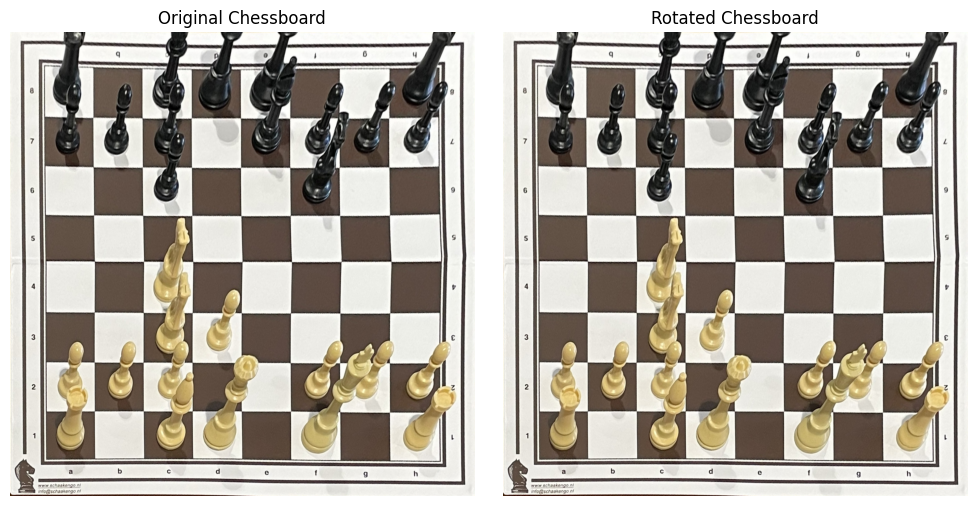

In [657]:
def rotate_knight_to_bottom_left(image, knight_pos):
    h, w = image.shape[:2]
    cx, cy = w // 2, h // 2
    
    x, y = knight_pos 

    print(f"Knight position: ({x}, {y}) | Center: ({cx}, {cy})")

    if x < cx and y < cy:
        angle = 90  
    elif x >= cx and y < cy:
        angle = 180 
    elif x >= cx and y >= cy:
        angle = 270 
    else:
        angle = 0  

    print(f"Rotating {angle}º to place the knight in the bottom-left corner")

    if angle == 90:
        rotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    elif angle == 180:
        rotated = cv2.rotate(image, cv2.ROTATE_180) 
    elif angle == 270:
        rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) 
    else:
        rotated = image.copy() 

    return rotated, angle


rotated_chessboard, rotation_angle = rotate_knight_to_bottom_left(warped, knight_pos)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Chessboard")
plt.imshow(warped_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Rotated Chessboard")
plt.imshow(cv2.cvtColor(rotated_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

Matrix before rotation:

[[1 0 1 1 1 0 0 1]
 [1 1 1 0 1 1 1 1]
 [0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [1 1 1 0 0 1 1 1]
 [1 0 1 1 0 1 0 1]]


No rotation needed for the matrix.

Matrix after rotation:

[[1 0 1 1 1 0 0 1]
 [1 1 1 0 1 1 1 1]
 [0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [1 1 1 0 0 1 1 1]
 [1 0 1 1 0 1 0 1]]


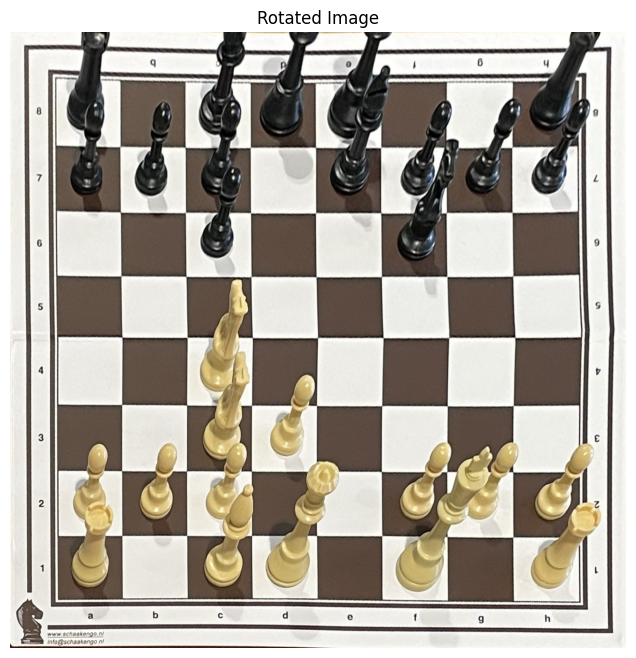

In [658]:
# Since we now dont rotate the image according to the knight position because its easier to detect the pieces in the chessboard, so we need to rotate the matrix according to the rotation angle

print("Matrix before rotation:\n")
print(matrix)
print("\n")

if rotation_angle == 90:
    print(f"Rotating the matrix {rotation_angle}º Counterclockwise")
    matrix = np.rot90(matrix, k=1)
elif rotation_angle == 180:
    print(f"Rotating the matrix {rotation_angle}º")
    matrix = np.rot90(matrix, k=2)
elif rotation_angle == 270:
    print(f"Rotating the matrix {rotation_angle}º Counterclockwise")
    matrix = np.rot90(matrix, k=3)
else:
    print(f"No rotation needed for the matrix.\n")

print("Matrix after rotation:\n")
print(matrix)


plt.figure(figsize=(8, 8))
plt.title("Rotated Image")
plt.imshow(cv2.cvtColor(rotated_chessboard, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## **Bounding Boxes**

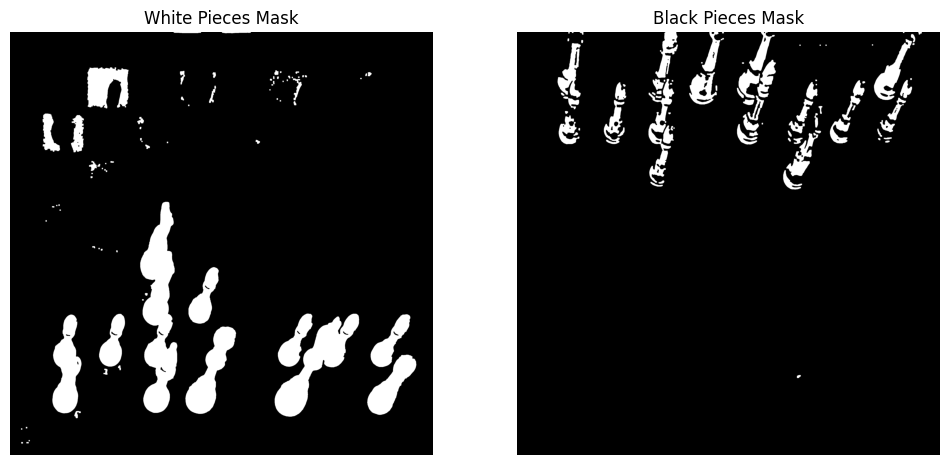

In [659]:
def create_piece_mask(img, lower_hsv, upper_hsv):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return cv2.inRange(hsv, lower_hsv, upper_hsv)

def clean_mask(mask, kernel_size=(5, 5), open_iter=2, close_iter=1):
    kernel = np.ones(kernel_size, np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=open_iter)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=close_iter)
    return mask

def preprocess_for_segmentation(img, blur_kernel=(11, 11)):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v_blurred = cv2.GaussianBlur(v, blur_kernel, 0)
    return cv2.merge([h, s, v_blurred])

WHITE_LOWER = np.array([10, 30, 100])
WHITE_UPPER = np.array([40, 180, 255])

BLACK_LOWER = np.array([0, 0, 0])
BLACK_UPPER = np.array([180, 255, 40])

smoothed = cv2.cvtColor(preprocess_for_segmentation(warped), cv2.COLOR_HSV2BGR)

white_mask = clean_mask(create_piece_mask(smoothed, WHITE_LOWER, WHITE_UPPER))
black_mask = clean_mask(create_piece_mask(smoothed, BLACK_LOWER, BLACK_UPPER))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("White Pieces Mask")
plt.imshow(white_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Black Pieces Mask")
plt.imshow(black_mask, cmap='gray')
plt.axis('off')
plt.show()


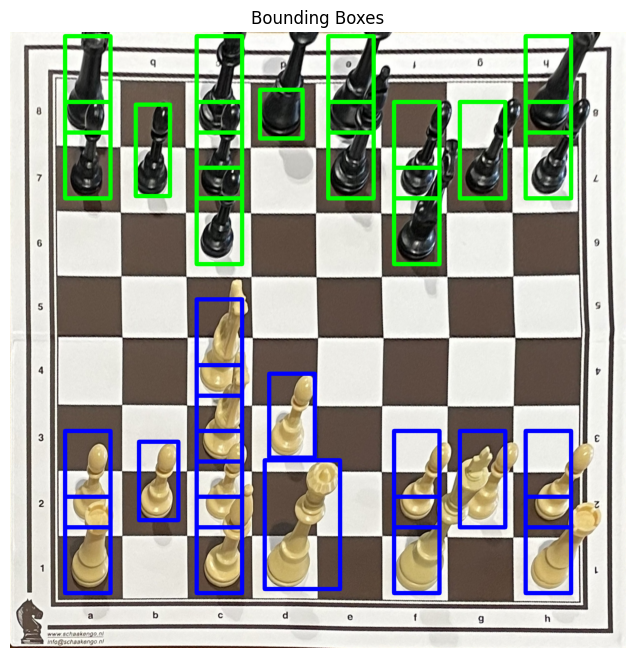

In [660]:
# --- Detect Stacked Pieces ---
def detect_stacked_pieces(pieces):
    col_to_rows = defaultdict(list)
    for piece in pieces:
        col_to_rows[piece["col"]].append(piece["row"])

    stacked = set()
    for col, rows in col_to_rows.items():
        rows.sort()
        for i in range(len(rows) - 1):
            if rows[i + 1] == rows[i] + 1:
                stacked.add((rows[i], col))
                stacked.add((rows[i + 1], col))
    return stacked

# --- Detect Pieces Using Contours ---
def detect_pieces_using_contours(mask, min_area=25000, dilate_iter=2):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    fused_mask = np.zeros_like(mask)
    cv2.drawContours(fused_mask, contours, -1, 255, thickness=cv2.FILLED)

    kernel = np.ones((5, 5), np.uint8)
    fused_mask = cv2.dilate(fused_mask, kernel, iterations=dilate_iter)

    final_contours, _ = cv2.findContours(fused_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    boxes = []
    for cnt in final_contours:
        if cv2.contourArea(cnt) > min_area:
            x, y, w, h = cv2.boundingRect(cnt)
            boxes.append([x, y, x + w, y + h])
    return boxes

# --- Fallback for Undetected Pieces ---
def fallback_for_piece(piece, grid_info, w, h):
    cell = next(c for c in grid_info if c["row"] == piece["row"] and c["col"] == piece["col"])
    x1, y1, x2, y2 = cell["bbox"]
    return [
        max(0, x1 + 50),
        max(0, y1 - 200),
        min(w, x2 - 50),
        min(h, y2 - 50)
    ]

# --- Get The Bounding Boxes using the auxiliary functions (as this is a big and kinda complex function, we added comments to explain it) ---
def get_clean_bounding_boxes(mask, pieces=None, grid_info=None, min_area=25000, dilate_iter=2):
    h, w = mask.shape

    # Identify which pieces are stacked (same column, consecutive rows)
    stacked = detect_stacked_pieces(pieces) if pieces else set()

    # Detect bounding boxes using contour detection and dilation
    contour_boxes = detect_pieces_using_contours(mask, min_area, dilate_iter)

    # Initialize a dictionary to track which pieces have been detected
    detected = {(p["row"], p["col"]): False for p in pieces}

    final_boxes = []

    # Loop through each detected bounding box
    for bx in contour_boxes:
        x1b, y1b, x2b, y2b = bx
        overlaps_valid = False   # True if this box overlaps with a valid (non-stacked) piece
        discard_box = False      # True if this box overlaps with a stacked piece (we want to avoid that)

        # Check overlap with each piece on the board
        for p in pieces:
            coord = (p["row"], p["col"])
            # Find the corresponding grid cell
            cell = next(c for c in grid_info if c["row"] == p["row"] and c["col"] == p["col"])
            x1, y1, x2, y2 = cell["bbox"]

            # Calculate intersection area between bounding box and cell
            inter_area = max(0, min(x2, x2b) - max(x1, x1b)) * max(0, min(y2, y2b) - max(y1, y1b))
            cell_area = (x2 - x1) * (y2 - y1)

            # If there's significant overlap (>5% of the cell area), evaluate the match
            if inter_area / (cell_area + 1e-5) > 0.05:
                if coord in stacked:
                    # If it overlaps with a stacked piece, mark it for discard
                    discard_box = True
                    break
                else:
                    # Otherwise, it's a valid match
                    overlaps_valid = True
                    detected[coord] = True

        # If the box is valid and not discarded, keep it
        if overlaps_valid and not discard_box:
            final_boxes.append(bx)

    # Add fallback boxes for pieces that were not detected or are stacked
    for p in pieces:
        coord = (p["row"], p["col"])
        if coord in stacked or not detected[coord]:
            final_boxes.append(fallback_for_piece(p, grid_info, w, h))

    return final_boxes



def merge_close_bounding_boxes(boxes, max_distance=125):
    if not boxes:
        return []

    boxes = [np.array(box) for box in boxes]
    used = [False] * len(boxes)
    merged = []

    for i, box in enumerate(boxes):
        if used[i]:
            continue
        x1, y1, x2, y2 = box
        current = box.copy()
        used[i] = True

        for j in range(i + 1, len(boxes)):
            if used[j]:
                continue
            xx1, yy1, xx2, yy2 = boxes[j]
            if (abs(x1 - xx1) < max_distance or abs(x2 - xx2) < max_distance) and \
               (abs(y1 - yy1) < max_distance or abs(y2 - yy2) < max_distance):
                current[0] = min(current[0], xx1)
                current[1] = min(current[1], yy1)
                current[2] = max(current[2], xx2)
                current[3] = max(current[3], yy2)
                used[j] = True

        merged.append(current.tolist())

    return merged


def remove_weird_shapes(boxes, max_ratio=1.3):
    return [
        box for box in boxes
        if (box[2] - box[0]) <= (box[3] - box[1]) * max_ratio
    ]

# --- Pre-processing ---

grid_info_with_padding = [
    {
        "row": cell["row"],
        "col": cell["col"],
        "bbox": tuple(v + 220 for v in cell["bbox"])
    }
    for cell in grid_info
]

white_pieces = [p for p in pieces if p["color"] == "White"]
black_pieces = [p for p in pieces if p["color"] == "Black"]

# --- Detect bounding boxes for pieces ---

white_boxes = get_clean_bounding_boxes(white_mask, white_pieces, grid_info_with_padding)
white_boxes = merge_close_bounding_boxes(white_boxes)
white_boxes = remove_weird_shapes(white_boxes)

black_boxes = get_clean_bounding_boxes(black_mask, black_pieces, grid_info_with_padding)
black_boxes = merge_close_bounding_boxes(black_boxes)
black_boxes = remove_weird_shapes(black_boxes)

# --- Draw bounding boxes on the warped image ---

warped_copy = warped.copy()
for box in white_boxes:
    cv2.rectangle(warped_copy, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 20)
for box in black_boxes:
    cv2.rectangle(warped_copy, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 20)

plt.figure(figsize=(8, 8))
plt.title("Bounding Boxes")
plt.imshow(cv2.cvtColor(warped_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

X1: 1439, Y1: 1659, X2: 1686, Y2: 2015
X1: 955, Y1: 1733, X2: 1083, Y2: 1947
X1: 1326, Y1: 1498, X2: 1469, Y2: 1703
X1: 1026, Y1: 1399, X2: 1167, Y2: 1620
X1: 1087, Y1: 1527, X2: 1234, Y2: 1764
X1: 694, Y1: 1758, X2: 841, Y2: 2026
X1: 1150, Y1: 1664, X2: 1304, Y2: 1918
X1: 1789, Y1: 1532, X2: 1951, Y2: 1767
X1: 1990, Y1: 1490, X2: 2155, Y2: 1719
X1: 2186, Y1: 1450, X2: 2354, Y2: 1673
X1: 748, Y1: 1912, X2: 901, Y2: 2201
X1: 1219, Y1: 1810, X2: 1381, Y2: 2083
X1: 1876, Y1: 1668, X2: 2047, Y2: 1919
X1: 2284, Y1: 1579, X2: 2460, Y2: 1818
X1: 681, Y1: 1099, X2: 780, Y2: 1272
X1: 1031, Y1: 1012, X2: 1127, Y2: 1109
X1: 436, Y1: 1020, X2: 551, Y2: 1200
X1: 821, Y1: 959, X2: 941, Y2: 1131
X1: 1187, Y1: 901, X2: 1312, Y2: 1066
X1: 1706, Y1: 818, X2: 1837, Y2: 973
X1: 472, Y1: 1125, X2: 592, Y2: 1316
X1: 867, Y1: 1059, X2: 992, Y2: 1242
X1: 1244, Y1: 997, X2: 1373, Y2: 1172
X1: 1425, Y1: 967, X2: 1557, Y2: 1138
X1: 1602, Y1: 938, X2: 1736, Y2: 1105
X1: 1775, Y1: 909, X2: 1910, Y2: 1073
X1: 917, 

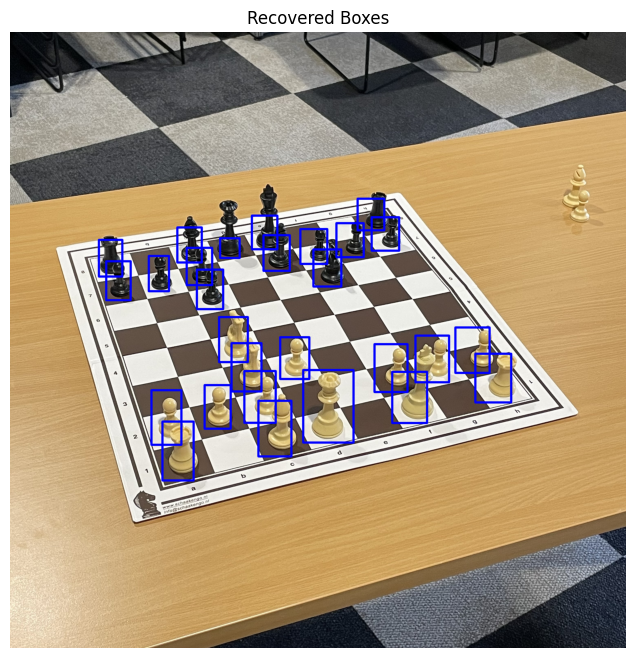

In [661]:
# Revert bounding boxes to original image space
def warp_boxes_back_to_original(bboxes, M_inv):
    all_pts = []
    for x1, y1, x2, y2 in bboxes:
        all_pts.extend([
            [x1, y1], [x2, y1],
            [x2, y2], [x1, y2]
        ])

    pts_array = np.array(all_pts, dtype=np.float32).reshape(-1, 1, 2)
    M_inv = M_inv.astype(np.float32)

    warped_back = cv2.perspectiveTransform(pts_array, M_inv)

    recovered_boxes = []
    for i in range(0, len(warped_back), 4):
        pts = warped_back[i:i + 4].reshape(-1, 2)
        xs, ys = pts[:, 0], pts[:, 1]
        recovered_boxes.append([
            int(xs.min()), int(ys.min()),
            int(xs.max()), int(ys.max())
        ])

    return recovered_boxes

# Shrink box width to avoid excessive width
def shrink_box_width(box, factor=0.60):
    x1, y1, x2, y2 = box
    cx = (x1 + x2) / 2
    new_half_width = (x2 - x1) * factor / 2
    return [int(cx - new_half_width), y1, int(cx + new_half_width), y2]


# Calculate inverse of the transformation matrix
M_inv = np.linalg.inv(M).astype(np.float32)

# Recover boxes in original image space
combined_boxes = white_boxes + black_boxes
recovered_boxes = warp_boxes_back_to_original(combined_boxes, M_inv)

# Remove boxes that are too wide
recovered_boxes = [shrink_box_width(box) for box in recovered_boxes]

recovered_image = image.copy()
for box in recovered_boxes:
    x1, y1, x2, y2 = box
    print(f"X1: {x1}, Y1: {y1}, X2: {x2}, Y2: {y2}")
    cv2.rectangle(recovered_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

plt.figure(figsize=(8, 8))
plt.title("Recovered Boxes")
plt.imshow(cv2.cvtColor(recovered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
